## Введение
В рамках данного проекта рассмотрим какие страны в 2024 году считаются самыми счастливыми или несчастными, и от каких факторов это зависит.

Ссылка на датасет: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

#### Что содержит датасет?
- `Country name`: Название страны.
- `Regional indicator`: Регион, в которых входит страна.
- `Ladder score`: Индекс счастья для каждой страны, основанный на ответах на вопрос Cantril о лестнице.
- `Upper whisker`: Максимальное значение индекса с учетом погрешности.
- `Lower whisker`: Минамальное значение индекса с учетом погрешности.
- `Log GDP per capita`: Натуральный логарифм ВВП страны на душу населения, скорректированный на паритет покупательной способности (ППС) для учета различий в стоимости жизни между странами.
- `Social support`: Среднее по стране количество бинарных ответов (либо 0, либо 1, что означает "Нет" / "Да") на вопрос о том, есть ли у вас родственники или друзья, на которых можно положиться в трудную минуту.
- `Healthy life expectancy`: Среднее количество лет, которое новорожденный младенец прожил бы в здоровом состоянии, исходя из показателей смертности и ожидаемой продолжительности жизни в разном возрасте.
- `Freedom to make life choices`: Среднее значение ответов по стране на вопрос об удовлетворенности свободой выбирать, что делать со своей жизнью.
- `Generosity`: остаток от регрессии среднего показателя по стране по ответам на вопрос о пожертвовании денег на благотворительность по отношению к ВВП на душу населения.
- `Perceptions of corruption`: Среднее значение ответов на вопросы опроса по стране о предполагаемых масштабах коррупции в правительстве и бизнесе.
- `Dystopia + residual`: Антиутопия - это воображаемая страна с наименее счастливыми людьми в мире, используемая в качестве ориентира для сравнения. Оценка "Антиутопия + остаточный балл" представляет собой комбинацию оценки "Антиутопия" и необъяснимого остаточного балла для каждой страны, гарантируя, что совокупный балл всегда положительный. Каждый из этих факторов вносит свой вклад в общий балл счастья, но остаточное значение "Антиутопия +" является эталоном, который гарантирует, что ни одна страна не получит более низкий балл, чем гипотетическая Антиутопия.

## Загрузка библиотек и данных

In [1]:
# Загружаем необходимые библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Загружаем данные и посмотрим как они выглядят
df = pd.read_csv('data/World-happiness-report-2024.csv')
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Удалим столбики `upperwhisker` и `lowerwhisker`, так как с ними мы точно не будем работать.

In [19]:
# Удалим строки с пропущенными значениями
data = df.drop('upperwhisker', axis='columns').drop('lowerwhisker', axis='columns')
data

,Country name,Regional indicator,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Теперь у нас осталось 143 страны и 10 параметров, по которым мы будем визуализировать и анализировать данные.

## Визуализируем данные
### Как много стран и регионов
Для начала посмотрим страны из каких регионов вообще принимали участие в опросе.

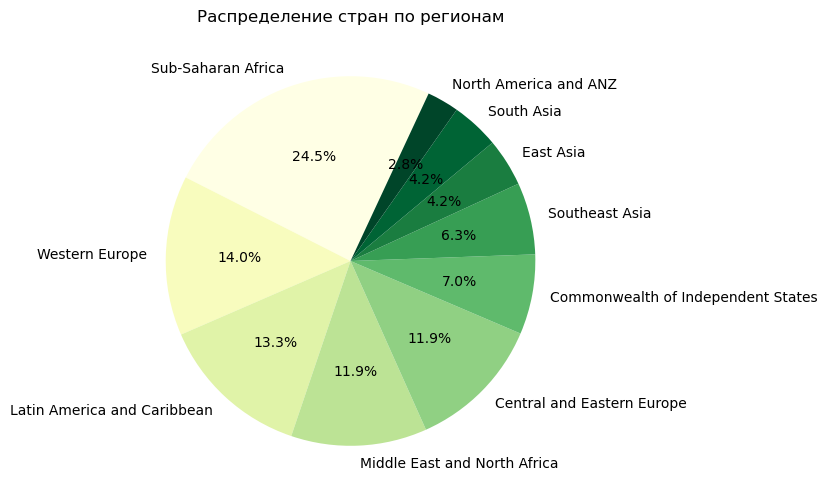

In [34]:
#Считаем количество уникальных значений в столбце с регионами
region_counts = data['Regional indicator'].value_counts() #считаем количество уникальных значений в столбце с регионами
plt.figure(figsize=(6, 6))
#Создаем круговую диаграмму
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=65, colors=plt.cm.YlGn(np.linspace(0, 1, len(region_counts))))
plt.title('Распределение стран по регионам',fontsize=12)
plt.show()

## Какие регионы самые счастливые?

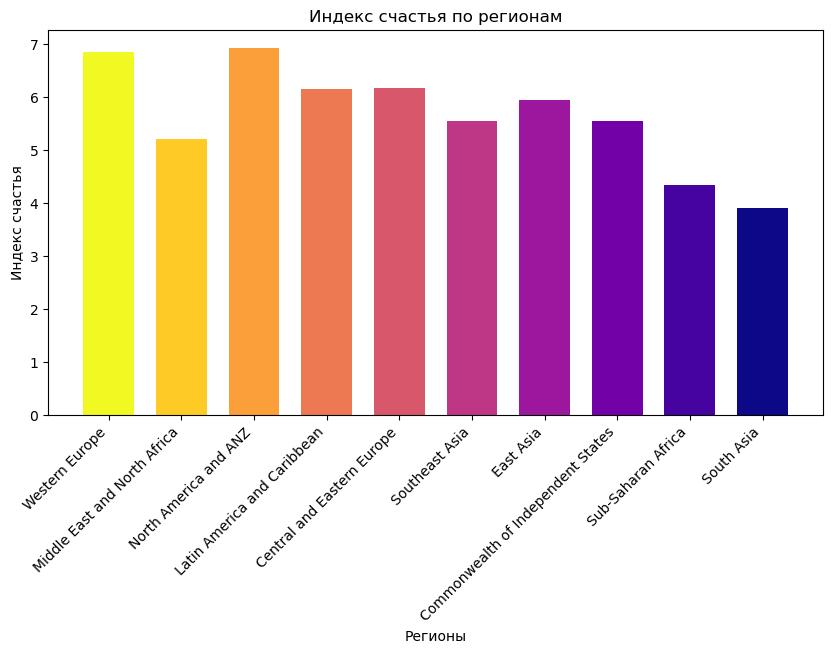

In [48]:
regions = data['Regional indicator'].unique() #выбираем уникальные значения из столбца с регионами
average_happiness = {} #создаем словарь, в котором будут средние значения по каждому региону
for i in regions:
    region_data = data[data['Regional indicator'] == i]
    average_data = region_data['Ladder score'].sum()/len(region_data)  # считаем среднее значение
    average_happiness[i] = average_data
plt.figure(figsize=(10,5))
colors = plt.cm.plasma(np.linspace(1, 0, len(average_happiness.keys()))) #создаем палитру
plt.bar(average_happiness.keys(), average_happiness.values(), color = colors, width=0.7) #строим барплот
plt.xticks(rotation=45, ha='right')
plt.xlabel('Регионы')
plt.ylabel('Индекс счастья')
plt.title('Индекс счастья по регионам')
plt.show()

## Показатели, влияющие на индекс счастья в регионах

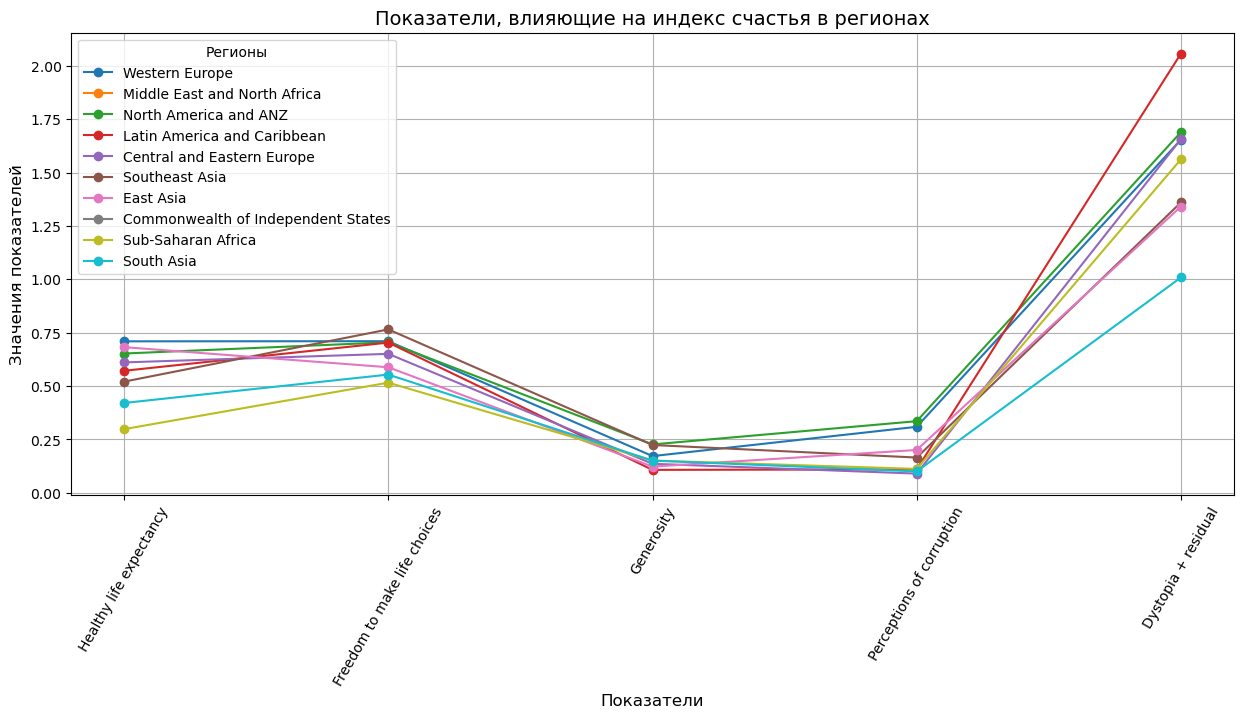

In [36]:
average_happiness = {}
regions = data['Regional indicator'].unique()
labels = list(data.columns[5:])  #убираем столбцы без показателей
for region in regions:
    region_data = data[data['Regional indicator'] == region]
    average_values = [] #создаем список для добавления средних значений
    for i in range(5, len(region_data.columns)):
        avg = sum(row[i] for row in region_data.values) / len(region_data) #для каждого столбца вычисляется среднее значение по всем строкам.
        average_values.append(avg) #средние значения добавляются в список
    average_happiness[region] = average_values  # добавляем средние значения в словарь
plt.figure(figsize=(15, 6))
for region, values in average_happiness.items():
    plt.plot(labels, values, marker='o', label=region) #строим линейный график для каждого региона
plt.title('Показатели, влияющие на индекс счастья в регионах', fontsize=14)
plt.xlabel('Показатели', fontsize =12)
plt.ylabel('Значения показателей', fontsize =12)
plt.xticks(rotation=60)
plt.legend(title='Регионы')
plt.grid()
plt.show()

## Что по странам?
Посмотрим как распределяется индекс счастья по странам, принимавшим участие в опросе.

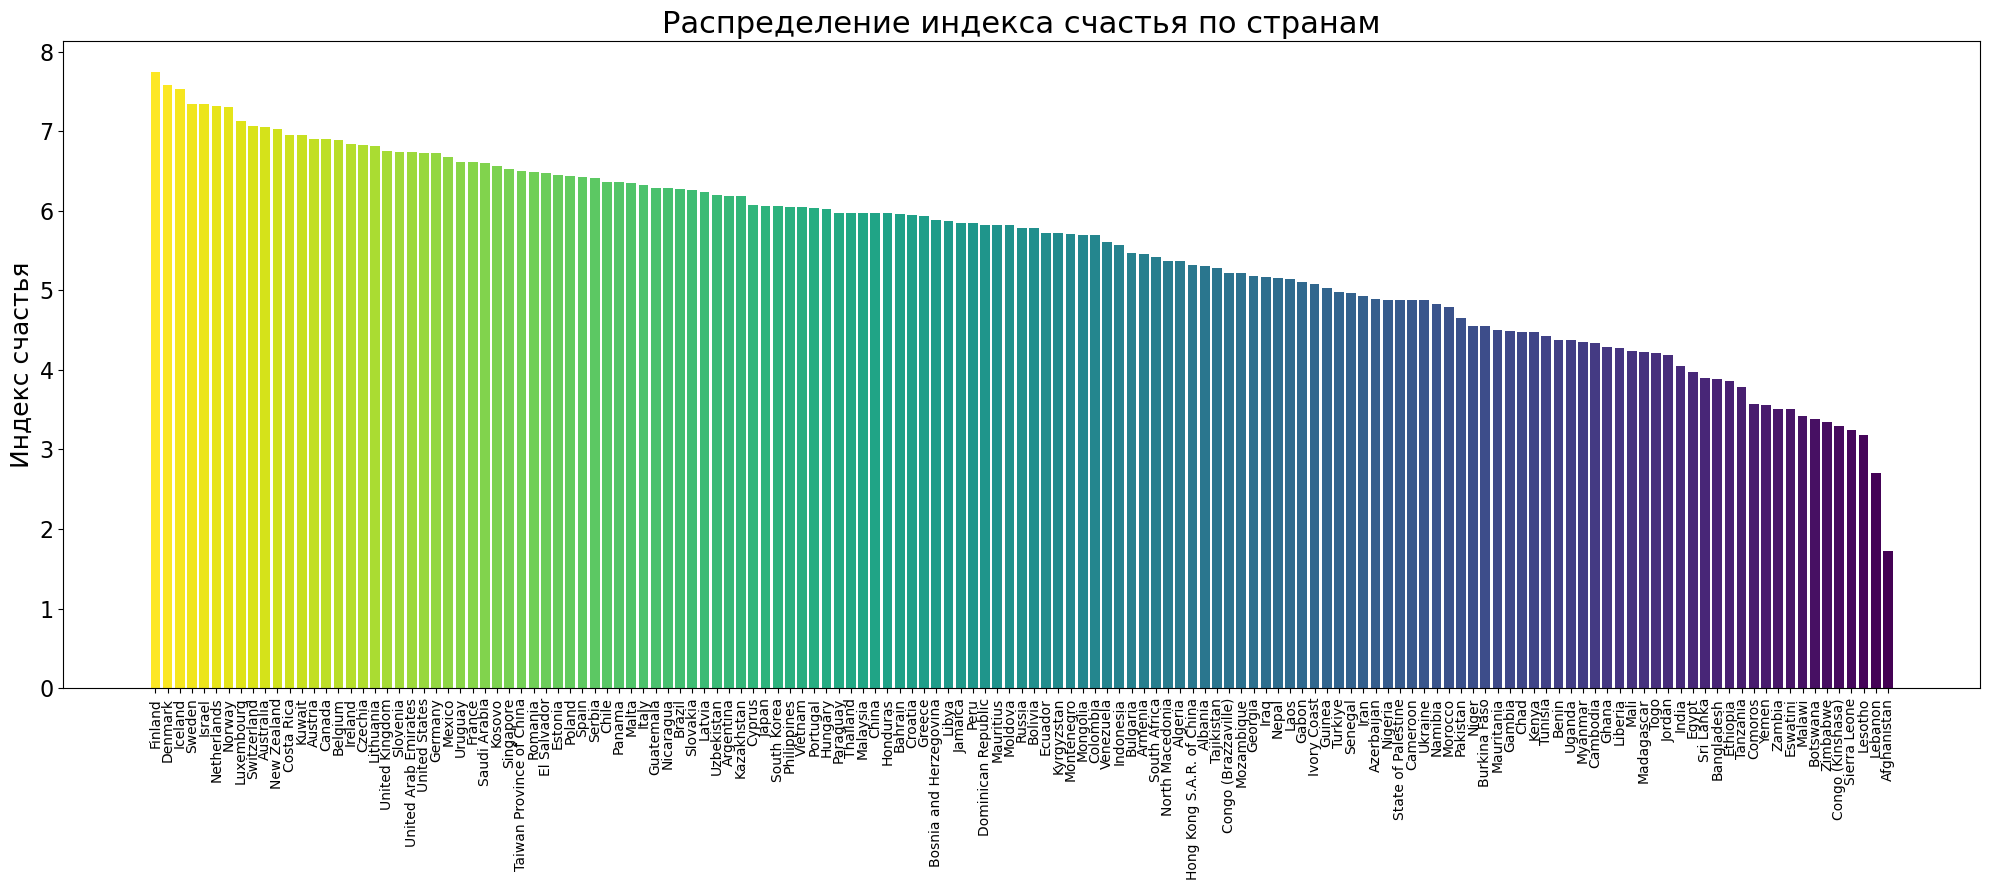

In [37]:
name, score = data['Country name'], data['Ladder score']
plt.figure(figsize=(20, 9))
colors = plt.cm.viridis(np.linspace(0, 1, len(name)))[::-1] # уникальные цвета
plt.bar(name, score, color=colors)
plt.xticks(rotation=90, ha='center')
plt.title('Распределение индекса счастья по странам', fontsize=22)
plt.ylabel('Индекс счастья', fontsize=18)
plt.gca().tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.show()

После того как мы увидели ситуацию глобально, найдем **топ 10 стран** с самым *высоким* и самым *низким* индексом счастья.

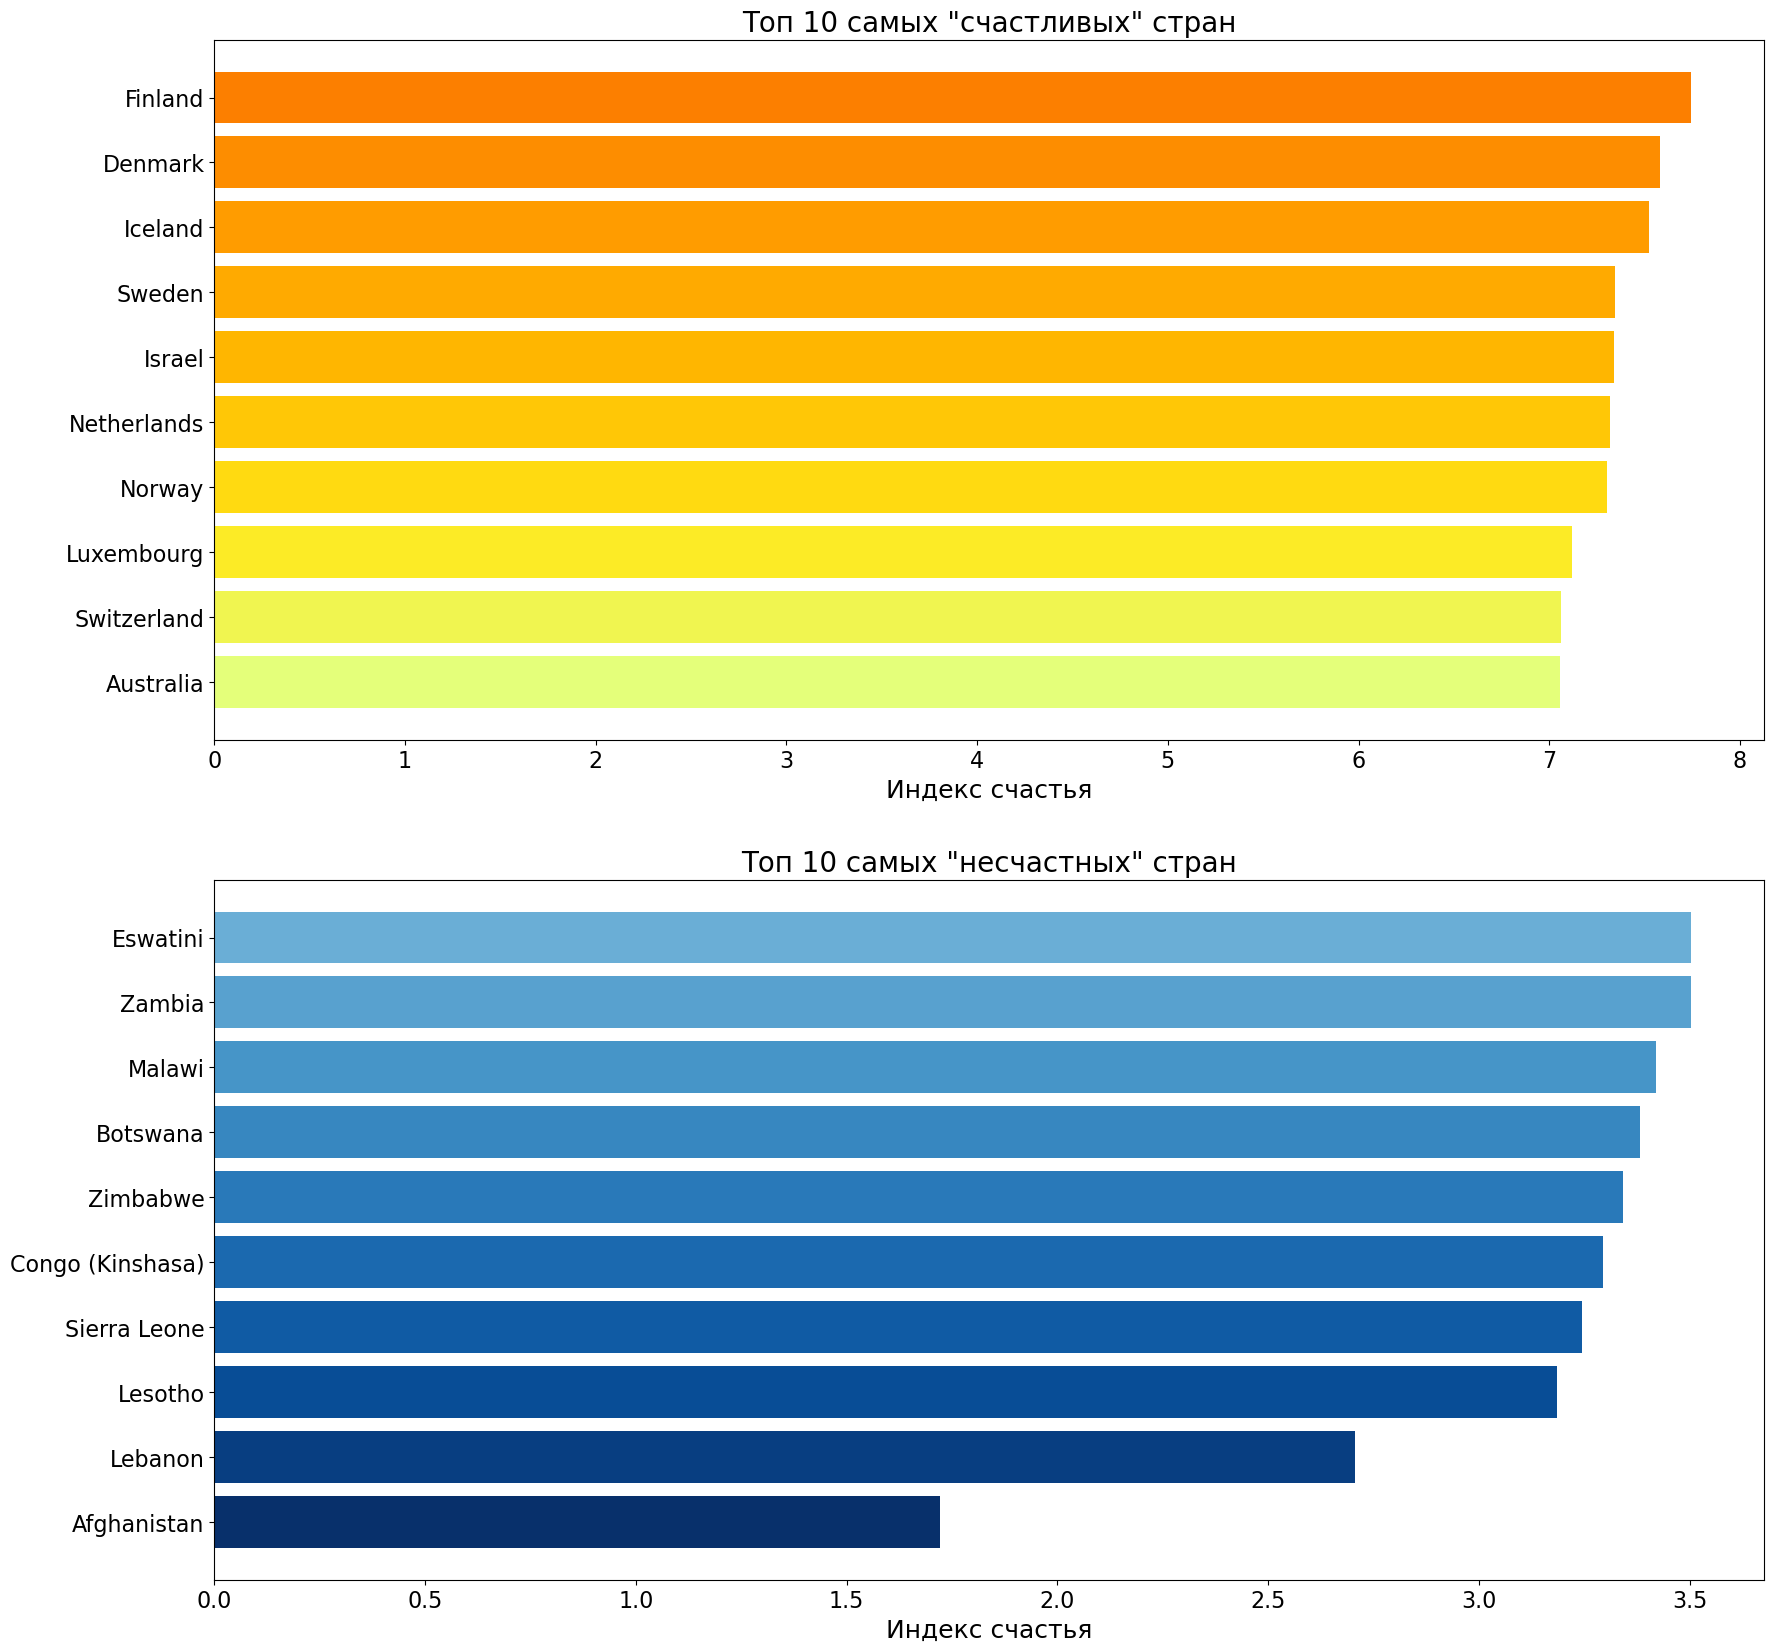

In [51]:
#Выбираем 10 стран-строк с наибольшим ladder score
top_10 = data.nlargest(10, 'Ladder score')
name_top_10, score_top_10 = top_10['Country name'], top_10['Ladder score']
#Выбираем 10 стран-строк с наименьшим ladder score
low_10 = data.nsmallest(10, 'Ladder score')
name_low_10, score_low_10 = low_10['Country name'], low_10['Ladder score']
#Создаем и оформляем два графика
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
#Первый график
colors_1 = plt.cm.Wistia(np.linspace(0, 1, len(name_top_10)))[::-1]
ax1.barh(name_top_10, score_top_10, color=colors_1)
ax1.set_title('Топ 10 самых "счастливых" стран', fontsize=20)
ax1.set_xlabel('Индекс счастья', fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.invert_yaxis()
#Второй график
colors_2 = plt.cm.Blues(np.linspace(0.5, 1, len(name_low_10)))[::-1]
ax2.barh(name_low_10, score_low_10, color=colors_2)
ax2.set_title('Топ 10 самых "несчастных" стран', fontsize=20)
ax2.set_xlabel('Индекс счастья', fontsize=18)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
plt.show()

Посмотрим как `Ladder score` (индекс счастья) зависит от `Log GDP per capita` (ВВП страны на душу населения) с помощью *диаграммы рессеяния*.

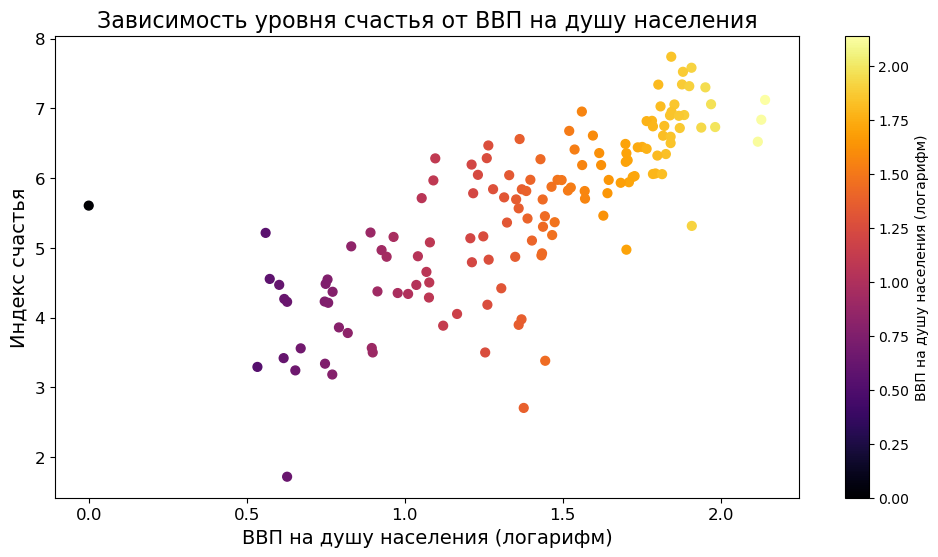

In [39]:
gdp, score = data['Log GDP per capita'], data['Ladder score']
plt.figure(figsize=(12, 6))
colors = plt.cm.inferno(np.linspace(0, 1, len(gdp)))
plt.scatter(gdp, score, c=gdp, cmap='inferno', marker='o', s=40)
plt.colorbar(label='ВВП на душу населения (логарифм)')
plt.title('Зависимость уровня счастья от ВВП на душу населения', fontsize=16)
plt.xlabel('ВВП на душу населения (логарифм)', fontsize=14)
plt.ylabel('Индекс счастья', fontsize=14)
plt.gca().tick_params(labelsize=12)
plt.show()

Далее посмотрим на распределение таких факторов, как `Generosity`, `Perceptions of corruption`, `Healthy life expectancy` в странах с наибольшим и наименьшим индексом счастья.

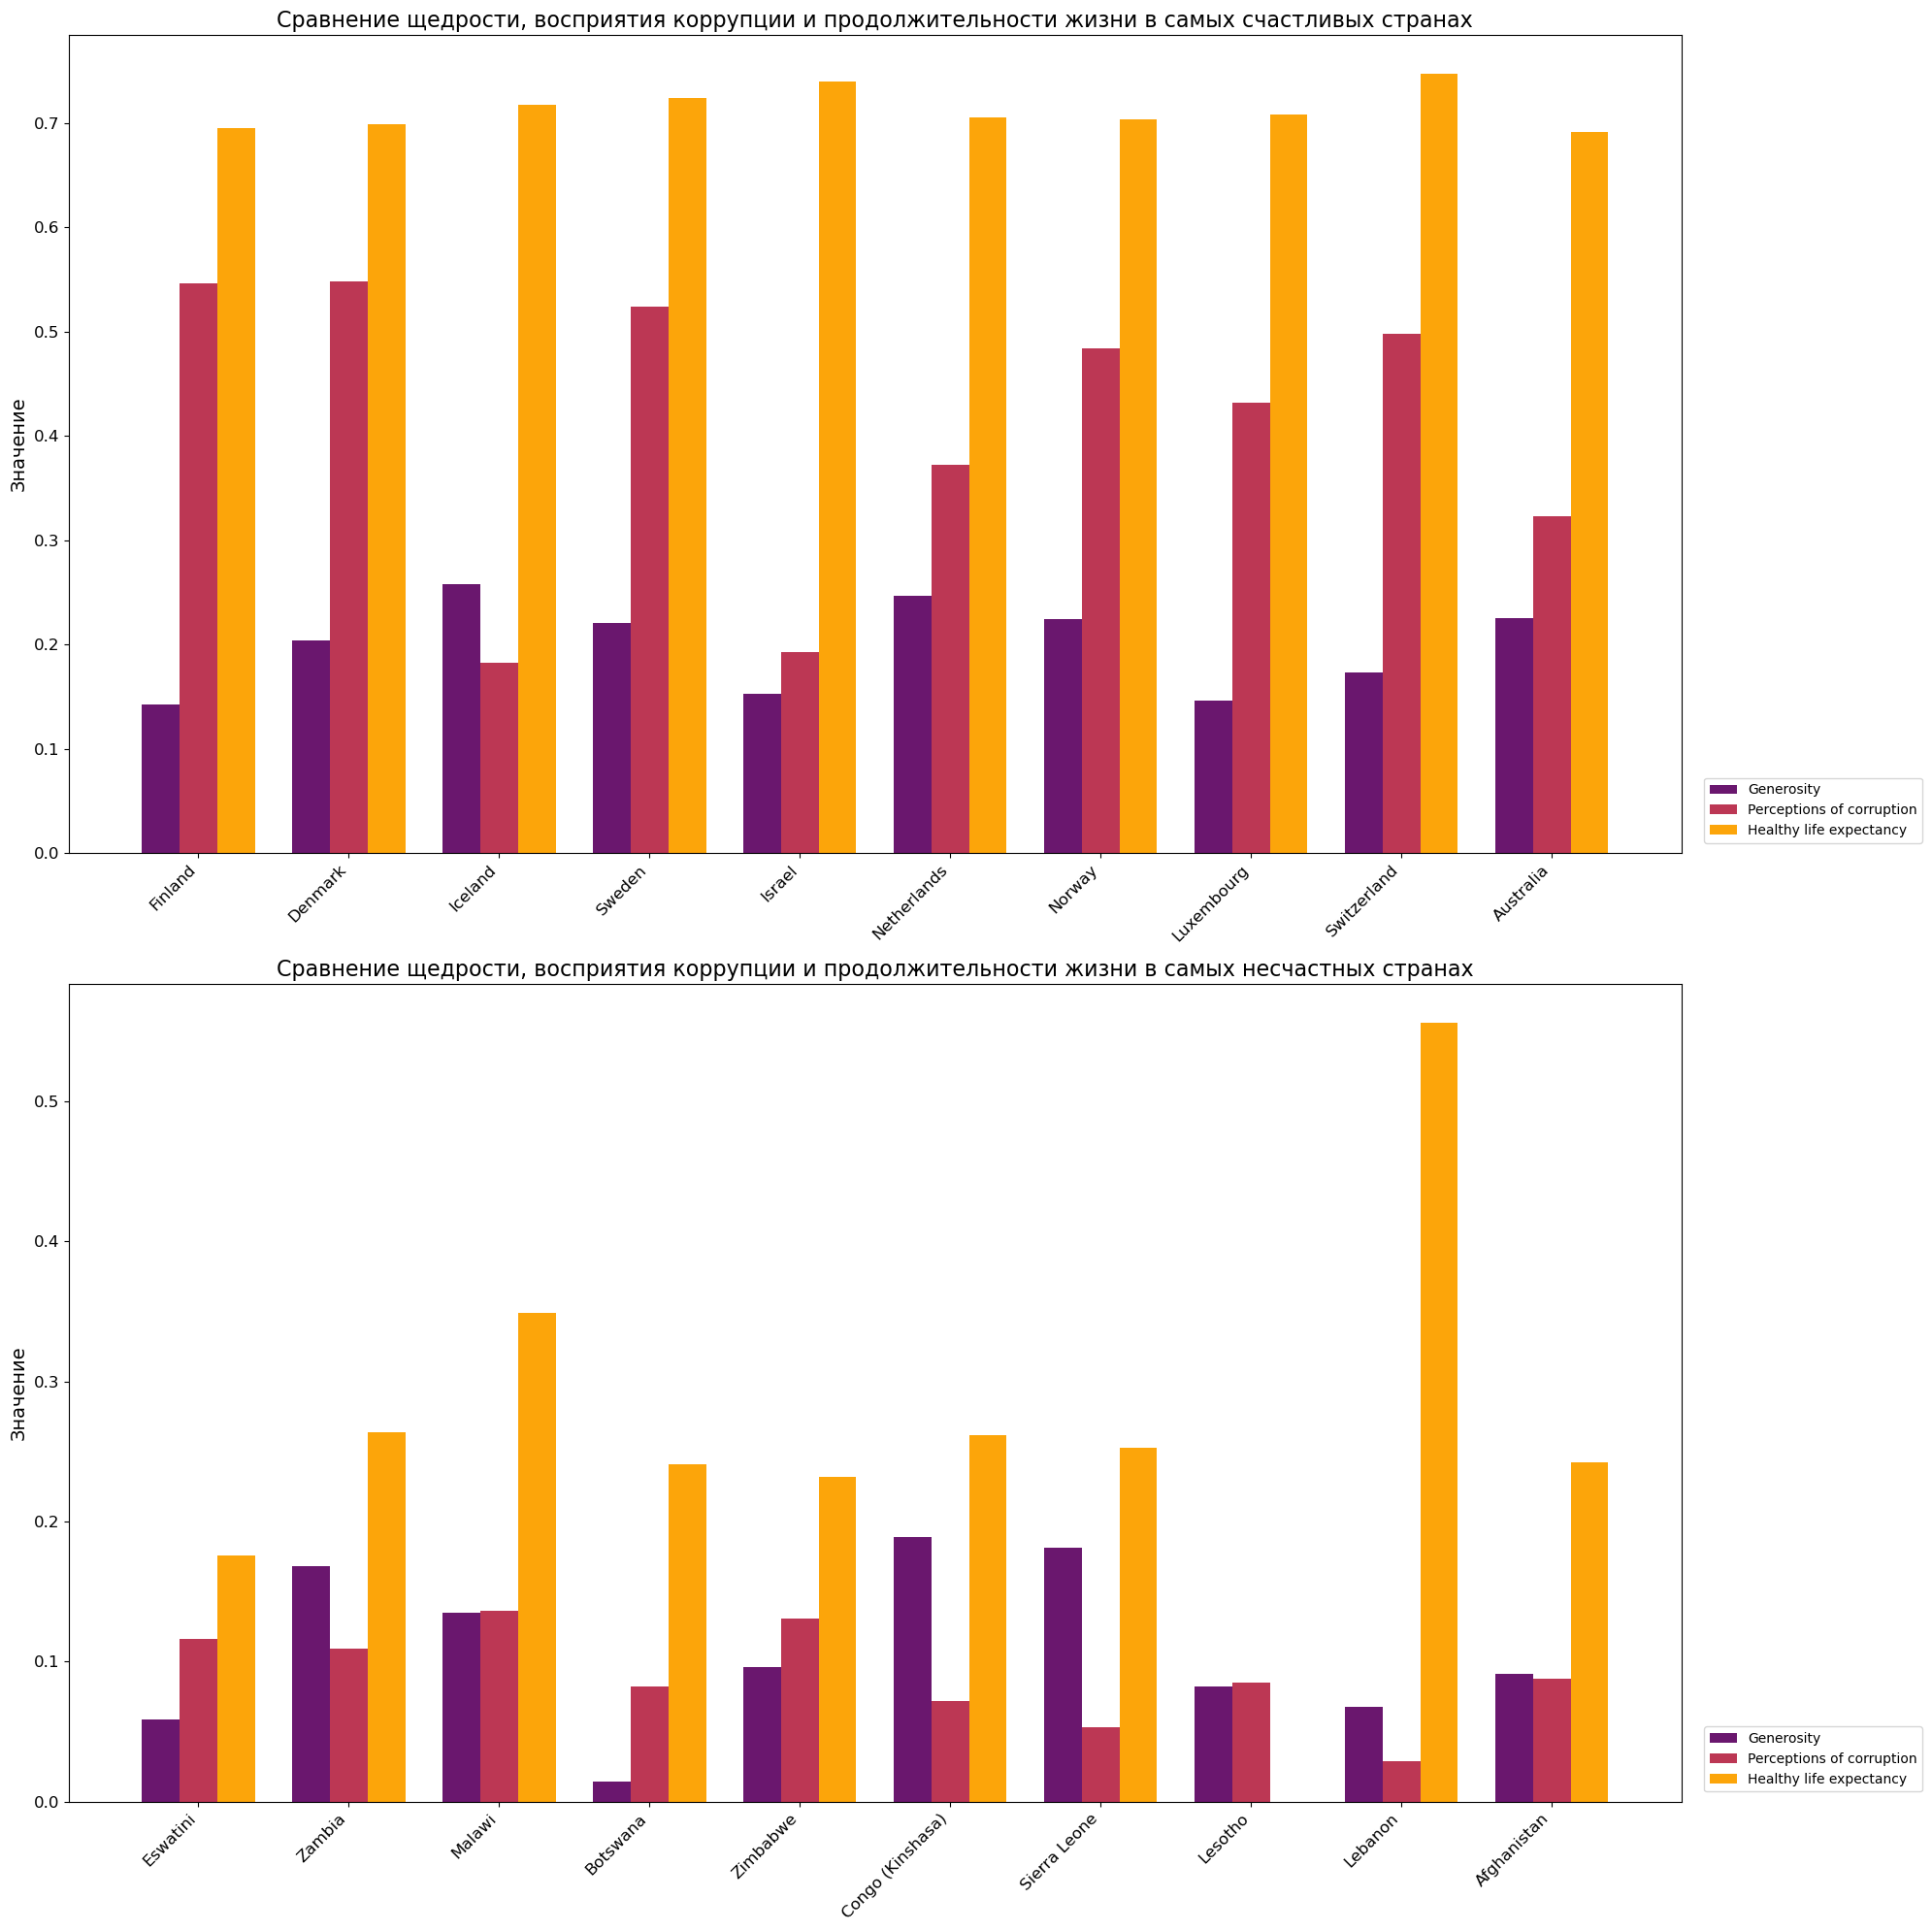

In [55]:
#Топ 10 стран с самым высоким индексом счастья, уже выбирали ранее: top_10 
generosity_top_10 = top_10['Generosity']
corruption_top_10 = top_10['Perceptions of corruption']
life_expectancy_top_10 = top_10['Healthy life expectancy']
a = np.arange(len(name_top_10))

#Топ 10 стран с самым низким индексом счастья, уже выбирали ранее: low_10 
generosity_low_10 = low_10['Generosity']
corruption_low_10 = low_10['Perceptions of corruption']
life_expectancy_low_10 = low_10['Healthy life expectancy']
b = np.arange(len(name_low_10))

#Создаем и оформляем столбчатую диаграмму
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
w = 0.25
colors = plt.get_cmap('inferno')
#Первый график
ax1.bar(a-w, generosity_top_10, width=w, align='center', label='Generosity', color=colors(0.3))
ax1.bar(a, corruption_top_10, width=0.25, align='center', label='Perceptions of corruption', color=colors(0.5))
ax1.bar(a+w, life_expectancy_top_10, width=0.25, align='center', label='Healthy life expectancy', color=colors(0.8))
ax1.set_title('Сравнение щедрости, восприятия коррупции и продолжительности жизни в самых счастливых странах', fontsize=16)
ax1.set_xticks(a, top_10['Country name'], rotation=45, ha='right', fontsize=14)
ax1.set_ylabel('Значение', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.legend(bbox_to_anchor=(1.01, 0.1), loc='upper left')
#Второй график
ax2.bar(b+w, generosity_low_10, width=w, align='center', label='Generosity', color=colors(0.3))
ax2.bar(b, corruption_low_10, width=0.25, align='center', label='Perceptions of corruption', color=colors(0.5))
ax2.bar(b-w, life_expectancy_low_10, width=0.25, align='center', label='Healthy life expectancy', color=colors(0.8))
ax2.set_title('Сравнение щедрости, восприятия коррупции и продолжительности жизни в самых несчастных странах', fontsize=16)
ax2.set_xticks(b, low_10['Country name'], rotation=45, ha='right', fontsize=14)
ax2.set_ylabel('Значение', fontsize=14)
ax2.invert_xaxis()
ax2.tick_params(labelsize=12)
ax2.legend(bbox_to_anchor=(1.01, 0.1), loc='upper left')
plt.tight_layout()
plt.show()

## А где Россия?

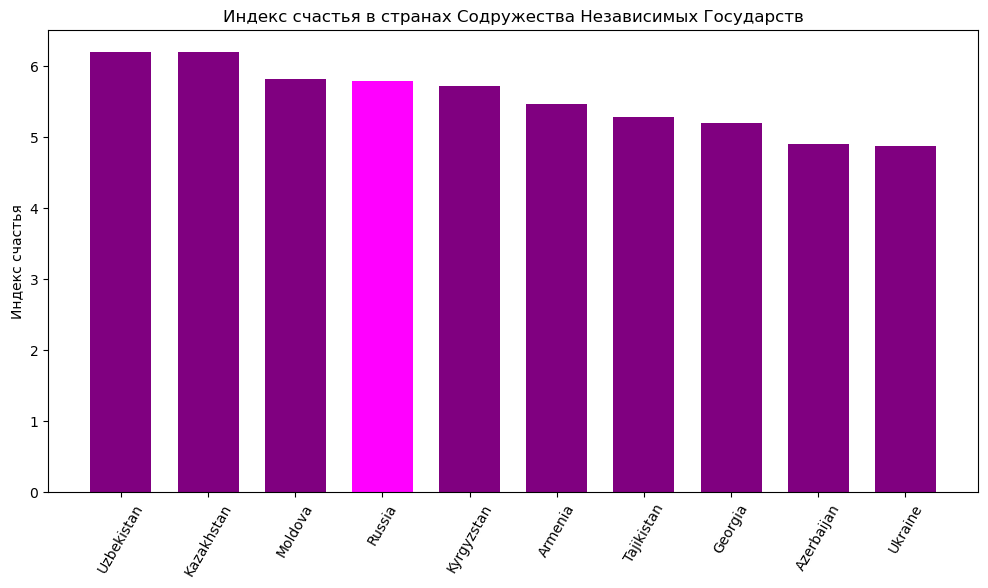

In [47]:
cis_data = [] #создаем список, в который будут добавлены страны Содружества Независимых Государств
for i in range(len(data['Country name'])):
    if data['Regional indicator'][i] == 'Commonwealth of Independent States': # проверяем, принадлежит ли страна к CIS
        cis_data.append({'Country name': data['Country name'][i],'Ladder score': data['Ladder score'][i]})# добавляем страну и индекс счастья в список
for country in cis_data: # проходимся по списку стран CIS
    if country['Country name'] == 'Russia':
        russia_score = country['Ladder score']
        break 
plt.figure(figsize=(12, 6))
colors = ['magenta' if country['Country name'] == 'Russia' else 'purple' for country in cis_data]
plt.bar([country['Country name'] for country in cis_data], [country['Ladder score'] for country in cis_data], color=colors, width=0.7) #строим барплот, где  x -список названий стран, а y - список индексов счастья
plt.ylabel('Индекс счастья')
plt.title('Индекс счастья в странах Содружества Независимых Государств')
plt.xticks(rotation=60)
plt.show()

## Выводы
В данном проекте были определены самые **"счастливые"** и самые **"несчастные"** регионы мира в 2024 году, а также проанализирован топ-10 самых "счастливых" и топ-10 самых "несчастных" стран путем изучения влияния различных факторов, таких как щедрость, восприятие коррупции и продолжительность жизни на индекс счастья. Отдельно была изучена зависимость уровня счастья от ВВП. Индекс счастья в России сравнивался с индексом в  странах Содружества Независимых Государств. Данные были визуализированы при помощи барплотов, круговых диаграмм, графиков и диаграмм рассеяния. В результате были сформированы следующие **выводы**:

1) Самые "счастливые" регионы мира - Западная Европа, Северная Америка и Австралия с Новой Зеландией, самый "несчастный" регион - Южная Азия
2) В **топ-10 самых "счастливых" стран** входят Финляндия, Дания, Исландия, Швеция, Израиль, Нидерланды, Норвегия, Люксембург, Швейцария и Австралия. В них наблюдается наиболее высокая высокая продолжительность жизни, а также высокий уровень восприятия коррупции. 
3) Чем выше ВВП на душу населения, тем выше индекс счастья
4) В **топ-10 самых "несчастных"стран** входят Эсватини, Замбия, Малави, Ботсвана, Зимбабве, Конго, Сьерра-Леоне, Лесото, Ливан и Афганистан. В них наблюдается низкая продолжительность жизни и низкий уровень восприятия коррупции.
5) Уровень щедрости в странах почти не оказывает влияния на индекс счастья
6) Среди стран Содружества Независимых Государств Россия занимает 4 место по индексу счастья после Узбекистана, Казахстана и Молдовы.

*P.S. Ураа! Мы прошли курс по питону! Всем счастья! Мир, дружба, жвачка!*

*P.S.S. Как говорила одна известная женщина-географ: «Никогда ничего не бойтесь, живите здесь и сейчас. Кайфуйте! Жизнь одна»*

![Alt Text](data/happy_cat.gif)